In [ ]:
!pip install matplotlib
!pip insatall numpy

ERROR: unknown command "insatall" - maybe you meant "install"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


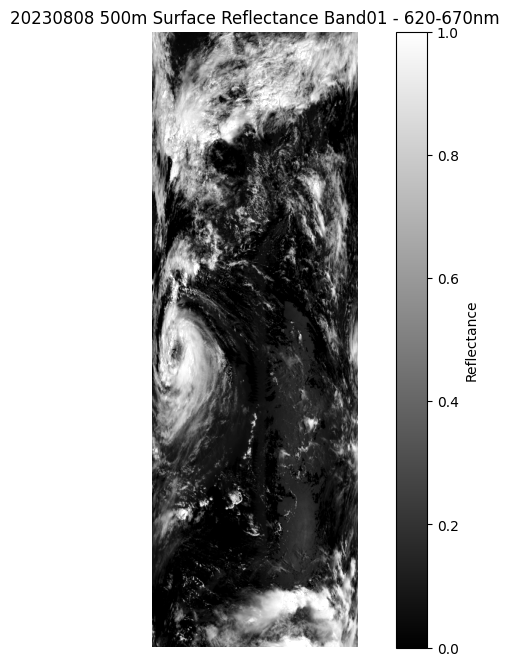

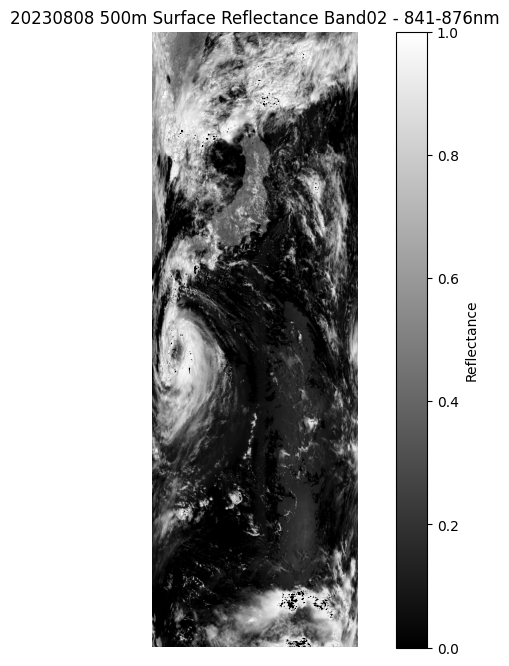

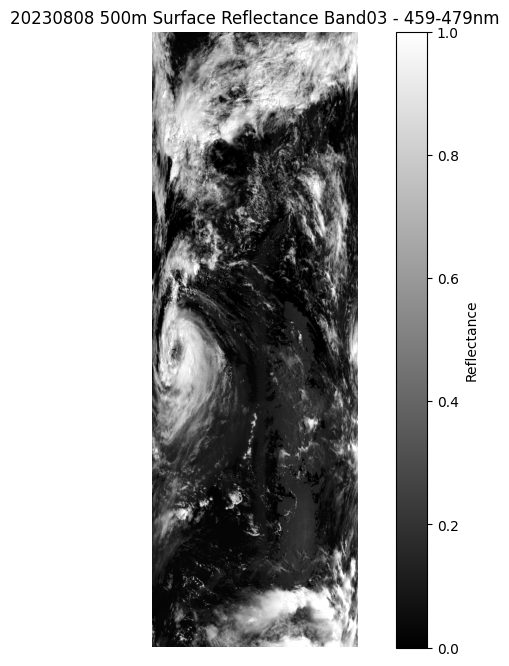

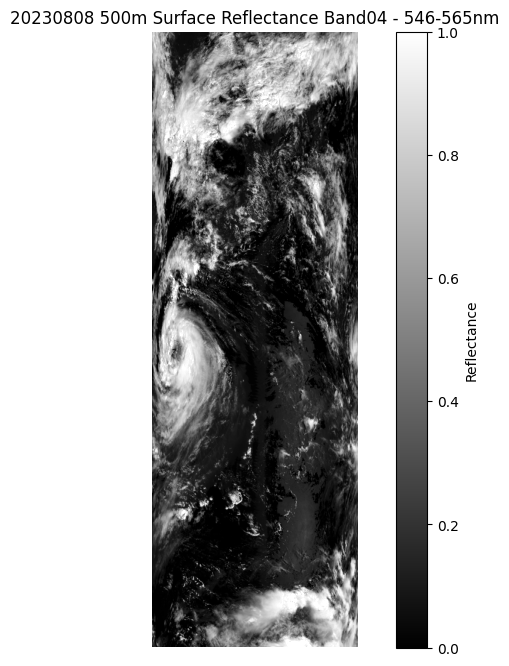

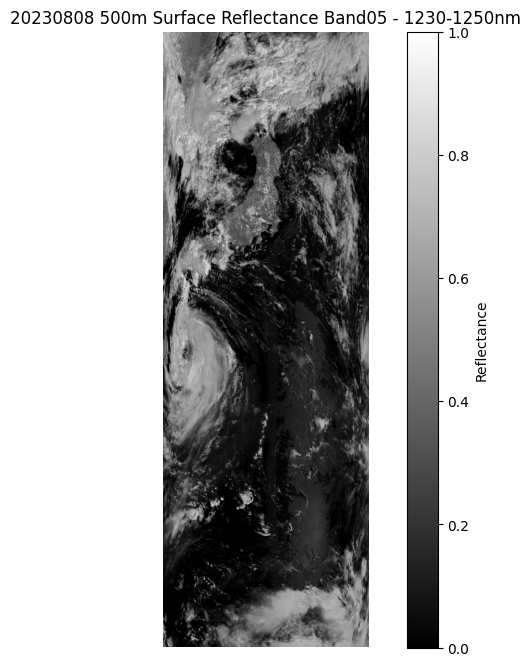

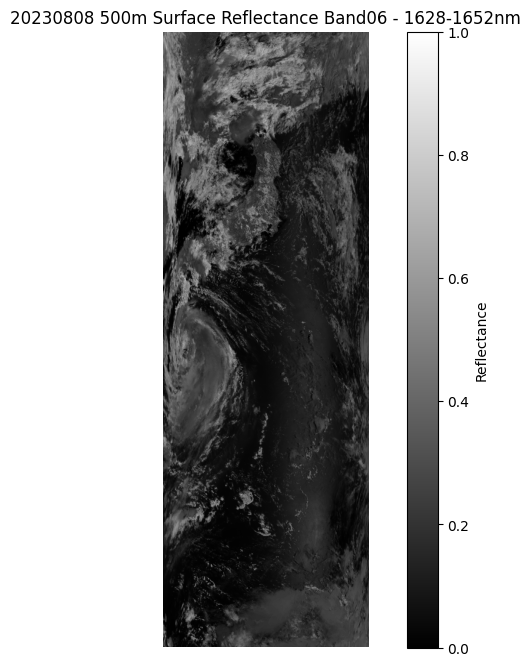

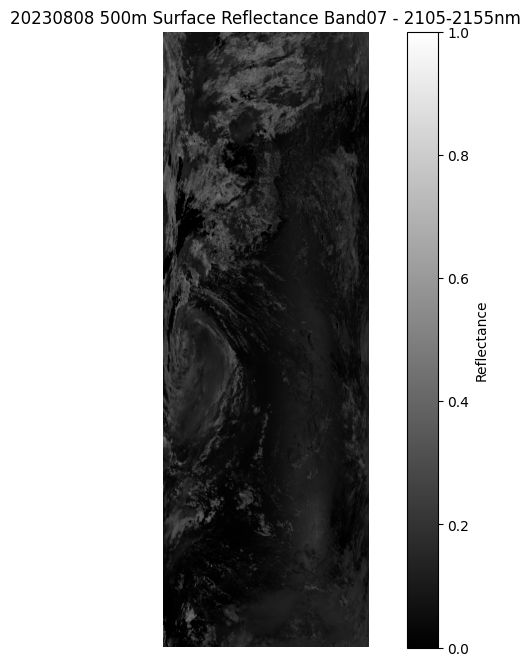

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
from osgeo import gdal

#　データ保存先のドライブをマウントする
from google.colab import drive
drive.mount('/content/drive')

# データ保存先のPath
hdfpath = "/content/drive/MyDrive/Colab Notebooks/"

# 今回可視化するバンド１〜７
band_num = np.arange(9, 16)

# データの観測年月日
date = "20230808"

# バンドと波長の情報
band_info = {
    "Band01": "620-670nm",
    "Band02": "841-876nm",
    "Band03": "459-479nm",
    "Band04": "546-565nm",
    "Band05": "1230-1250nm",
    "Band06": "1628-1652nm",
    "Band07": "2105-2155nm"
}

# 指定したバンドのデータから値を抽出しarrayとして返す
# 0.0001=オフセット項
def process_band(input_dataset, band_num):
    band = gdal.Open(input_dataset.GetSubDatasets()[band_num][0]).ReadAsArray() * 0.0001
    return band

# データセットの生成
datasets = []
for i in range(len(band_num)):
    input_datasets = [gdal.Open(os.path.join(hdfpath, f'MOD09.A2023220.0105.061.2023222020824.hdf')),
                      gdal.Open(os.path.join(hdfpath, f'MOD09.A2023220.0110.061.2023222021036.hdf'))]

    bands = [process_band(dataset, band_num[i]) for dataset in input_datasets]
    combined_band = np.concatenate(bands, axis=0)
    datasets.append(combined_band)

# データセットの可視化
for idx, data in enumerate(datasets):
    plt.figure(figsize=(10, 8))
    plt.imshow(data, cmap='gray', vmax=1.0, vmin=0)

    band_name = "Band" + str(idx + 1).zfill(2)
    wavelength = band_info.get(band_name, "Unknown")

    plt.title(f"{date} 500m Surface Reflectance {band_name} - {wavelength}")
    plt.colorbar(label='Reflectance')
    plt.axis('off')
    plt.show()
